<a href="https://colab.research.google.com/github/VeatArt/ArtisticStylePhotoTransfer/blob/main/ArtisticStyleTransfer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
!pip install pycuda # install cuda
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 78 kB 7.0 MB/s 
     |████████████████████████████████| 69 kB 7.2 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=626634 sha256=f5404a16ec4fbbaa0a13b8569eea47e6744e2d6c5076a1c7b105cc86674986e8
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2022.1.9-py2.py3-none-any.whl size=64666 sha256=ff21f950ec845f3410499c3c36db60d2ed2c23af4034813b876bd32a41d62971
  Stored in directory: /root/.cache/pip/wheels/11/d8/85/01a8cf50977badf2da880865124b159b112b861655a9b631d3
Successfully built pycuda pytools


In [ ]:
!git clone https://github.com/LouieYang/deep-photo-styletransfer-tf.git

Cloning into 'deep-photo-styletransfer-tf'...
remote: Enumerating objects: 481, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 481 (delta 0), reused 0 (delta 0), pack-reused 478
Receiving objects: 100% (481/481), 165.48 MiB | 46.56 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [ ]:
#def tensor_to_image(tensor):
 # tensor = tensor*255
 # tensor = np.array(tensor, dtype=np.uint8)
 # if np.ndim(tensor)>3:
   # assert tensor.shape[0] == 1
   # tensor = tensor[0]
 # return PIL.Image.fromarray(tensor)

In [ ]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
Tue May  3 02:54:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    61W / 149W |  11065MiB / 11441MiB |      0%      Default |
|                               |            

In [ ]:
def load_image(img_path):
  img = tf.io.read_file(img_path)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)
  img = img[tf.newaxis, :]
  return img


In [ ]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
content_image = load_image('/content/IMG_9749.jpg')
style_image = load_image('/content/Download.jpg')

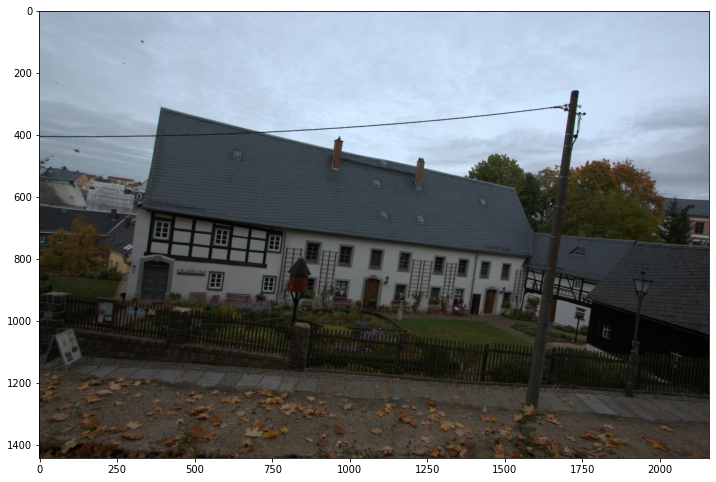

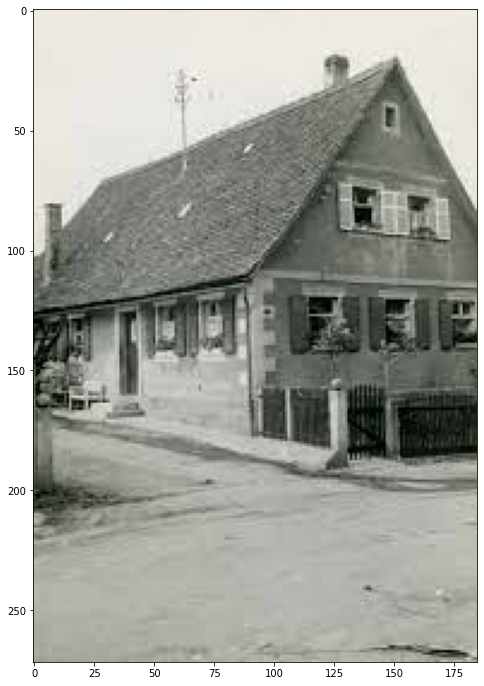

In [ ]:
plt.imshow(np.squeeze(content_image))
plt.show()
plt.imshow(np.squeeze(style_image))
plt.show()

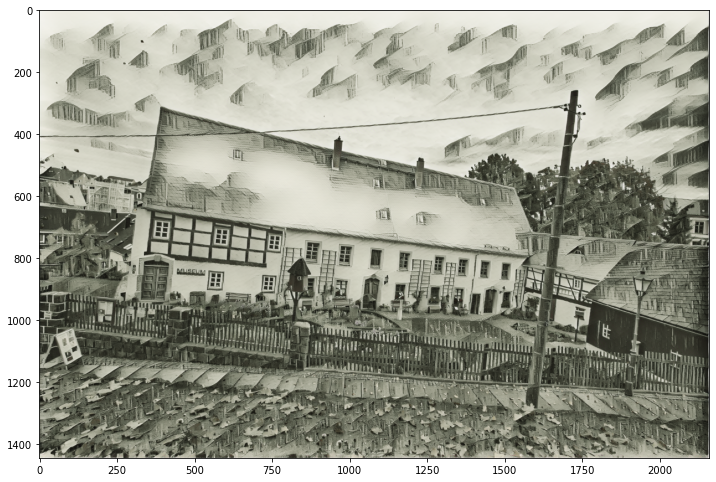

In [ ]:
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
#tensor_to_image(stylized_image)
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [ ]:
cv2.imwrite('IMG_9749G.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True